In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [ ]:
# Load dataset
data = pd.read_csv("/heart.csv")
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs",
                "restecg", "thalach", "exang", "oldpeak",
                "slope", "ca", "thal", "target"]

# print("Dataset Head:")
# print(data)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
print("\nMissing Values:\n", data.isnull().sum())

# Replace missing or '?' values with NaN
data.replace('?', np.nan, inplace=True)

# Convert non-numeric columns to numeric (if necessary)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Check data types and statistics
print("\nData Info:")
print(data.info())
print("\nSummary Statistics:\n", data.describe())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
me

In [ ]:
# Convert categorical variables like 'sex', 'cp', 'slope', 'thal', 'ca' into dummy variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training set size: 242
Testing set size: 61


In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


Accuracy: 86.89%

Confusion Matrix:
 [[26  3]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


ROC-AUC Score: 0.93


In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Reset the index for easier viewing
comparison.reset_index(drop=True, inplace=True)

# Display the comparison
print("Actual vs Predicted Comparison:\n")
# print(comparison.head(31))  # Display the first 20 rows
comparison.head(61)

Actual vs Predicted Comparison:



,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


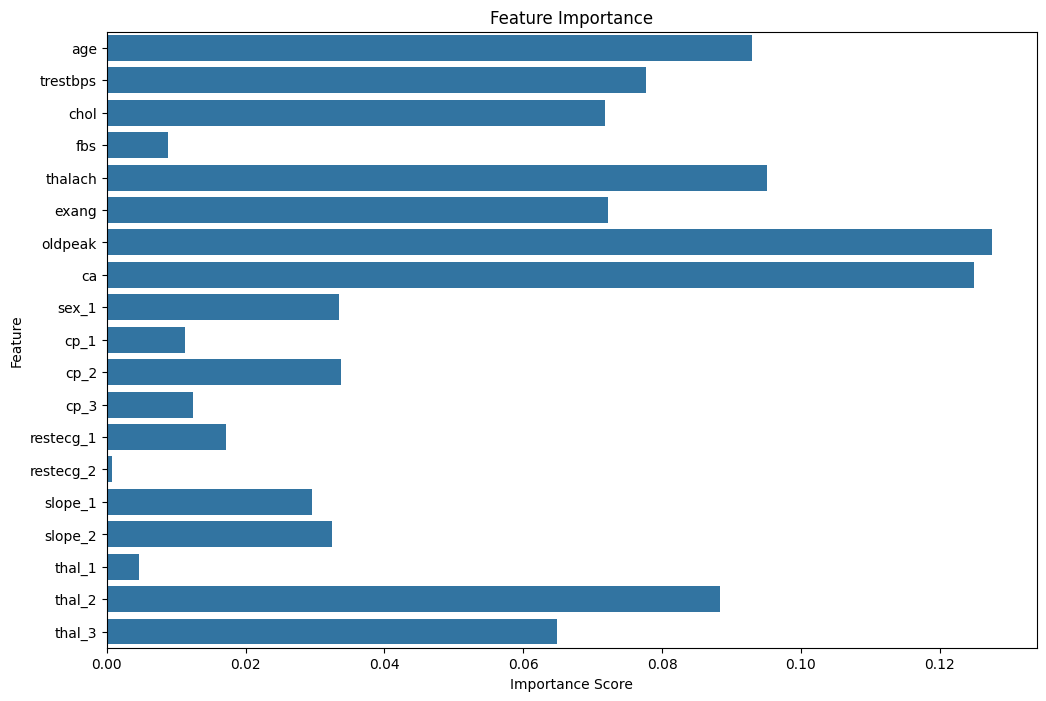

In [ ]:
# Feature importance
importance = model.feature_importances_
feature_names = X.columns

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
